In [1]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read in the csv filed
df = pd.read_csv('housingdata.csv')

,Unnamed: 0,Price,Beds,Baths,Sq_Footage,Address
0,0,"$795,000.00",6 beds,3.5 baths,"4,500","163 E 540 N, Vineyard, UT 84059"
1,1,"$540,000.00",4 beds,3 baths,"1,768","616 N 800 W, Provo, UT 84601"
2,2,NaN,NaN,NaN,"1,768","616 N 800 W, Provo, UT 84601"
3,3,"$469,000.00",2 beds,2 baths,"1,586","1838 W 300 S Unit D, Mapleton, UT 84664"
4,4,"$534,900.00",3 beds,2 baths,"2,828","532 E Delano Peak Rd, Eagle Mountain, UT 84005"
...,...,...,...,...,...,...
382,382,"$895,000.00",6 beds,5 baths,"5,055","1814 S Columbia Ln E, Orem, UT 84097"
383,383,"$469,900.00",3 beds,2.5 baths,"2,689","216 W 170 N, Orem, UT 84057"
384,384,"$469,900.00",4 beds,3.5 baths,"2,790","83 N 380 W, Orem, UT 84057"
385,385,"$610,000.00",5 beds,2.5 baths,"2,593","11 N 500 W, Springville, UT 84663"


In [3]:
#use regular expressions to extract data from original columns
df['Beds'] = df['Beds'].str.extract(r'(\d+)').astype(float)
df['Baths'] = df['Baths'].str.extract(r'(\d+[^\s\d]?\d*)').astype(float)
df['City'] = df['Address'].str.extract(r',\s([^,]+),')
df['Zipcode'] = df['Address'].str.extract(r'(\d{5})$')
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)
df['Price'] = df['Price'].astype(float)
df['Sq_Footage'] = df['Sq_Footage'].str.replace(',' ,'')
df['Sq_Footage'] = df['Sq_Footage'].astype(float)
final = df.reset_index()
#select only the columns that you need
final = final[['Price', 'Beds', 'Baths', 'Sq_Footage', 'City', 'Zipcode']].dropna(subset = ['Price'])

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/wt/7bs38m4j2bd62qvlrr1lgwjm0000gn/T/ipykernel_4008/3282651204.py:5: SyntaxWarning: invalid escape sequence '\$'


In [4]:
#save dataframe
final.to_csv('housing_final.csv')

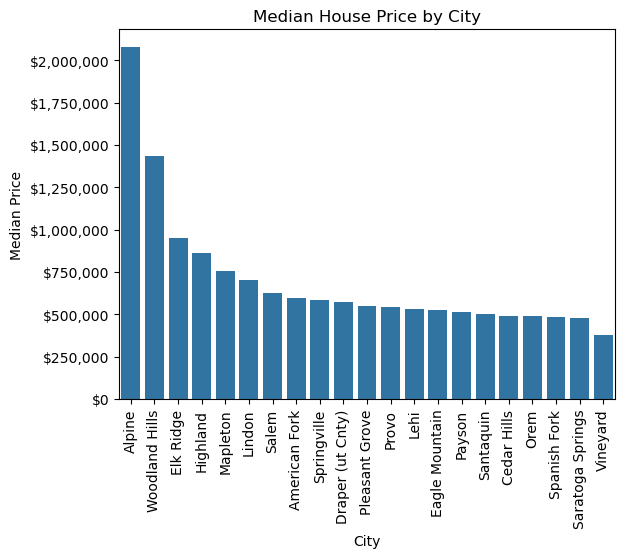

In [6]:
#create a graph for median home prices by city
median = final.groupby('City')['Price'].median()
median_city_df = median.reset_index().sort_values(by='Price', ascending=False)
median_city_df
#we want to use a bar plot
sns.barplot( x= 'City', y = 'Price', data = median_city_df)
plt.xticks(rotation = 90)
#change the format of the y-axis to have dollar signs
formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('City')
plt.ylabel('Median Price')
plt.title('Median House Price by City')
plt.savefig('median_house_price_by_city.png', bbox_inches='tight')
plt.show()

In [7]:
#find the median of house prices by the amount of bedrooms
median = final.groupby('Beds')['Price'].median()
median

Beds
2.0     330000.0
3.0     465950.0
4.0     582500.0
5.0     627500.0
6.0     723950.0
7.0     950000.0
8.0    1375000.0
9.0    2450000.0
Name: Price, dtype: float64

/var/folders/wt/7bs38m4j2bd62qvlrr1lgwjm0000gn/T/ipykernel_865/769333816.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Beds', y='Price', data=final, palette='viridis')


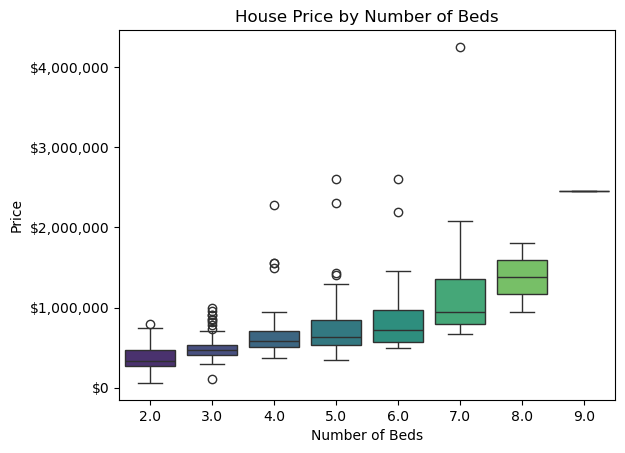

In [8]:
#create a boxplot of the prices by the number of bedrooms
sns.boxplot(x='Beds', y='Price', data=final, palette='viridis')
#change the y-axis to be in $ format
formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Number of Beds')
plt.ylabel('Price')
plt.title('House Price by Number of Beds')
plt.savefig('house_price_by_beds.png', bbox_inches='tight')
plt.show()

In [7]:
#import ggplot functions from plotnine
from plotnine import ggplot, ggsave, aes, geom_point, labs, geom_smooth

#filter to price less than $400,000
filtered_df = final[final['Price'] <= 400000]
plot = (ggplot(filtered_df, aes(x='Sq_Footage', y='Price'))
        + geom_point(color = 'cornflowerblue')  # Add points 
        + geom_smooth(method = "lm", se = False)
        + labs(title="Price by Square Footage under $400,000", x="Square Footage", y="Price"))

# Display the plot
plot.save("regression_plot2.png", dpi=300)

/Users/wilcobry000/miniconda3/envs/classesnew/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/wilcobry000/miniconda3/envs/classesnew/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: regression_plot2.png
